# **ANALYSE EXPLORATOIRE DE DONNEES**

# **Analyse Univariée**

In [ ]:
import pandas as pd

In [ ]:
!ls

penguin.csv  sample_data


In [ ]:
df = pd.read_csv("penguin.csv")

In [ ]:
df.shape

(333, 7)

La fonction **`head`** ([doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)) est utilisée pour afficher les premières lignes d'un DataFrame, fournissant un moyen rapide d'inspecter les données.

Quelques paramètres importants :

* `n`: Spécifie le nombre de lignes à afficher, par défaut 5.

```
df.head()
```

**<font color="blue">2.b. Afficher les 10 premières lignes de l'ensemble de données.**

In [ ]:
df.head(10)

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
6,Adelie,Torgersen,39.2,19.6,195,4675,MALE
7,Adelie,Torgersen,41.1,17.6,182,3200,FEMALE
8,Adelie,Torgersen,38.6,21.2,191,3800,MALE
9,Adelie,Torgersen,34.6,21.1,198,4400,MALE


**<font color="blue">2.c Afficher le résumé de l'ensemble de données.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              333 non-null    object 
 1   Island               333 non-null    object 
 2   Culmen Length (mm)   333 non-null    float64
 3   Culmen Depth (mm)    333 non-null    float64
 4   Flipper Length (mm)  333 non-null    int64  
 5   Body Mass (g)        333 non-null    int64  
 6   Sex                  333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


**<font color="blue">3.a. Afficher les noms des colonnes.**

In [ ]:
df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

**<font color="blue">3.b. Afficher les valeurs d'une des colonnes.**

In [ ]:
df["Species"]

,Species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
328,Gentoo
329,Gentoo
330,Gentoo
331,Gentoo


**<font color="blue">4.a. Selectionnez les colonnes catégorielles.**

In [ ]:
df_cat = df.select_dtypes(include=['O'])
df_cat.head()

,Species,Island,Sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,MALE


**<font color="blue">4.b. Selectionnez les colonnes numériques.**

In [ ]:
df_num = df.select_dtypes(exclude=['O'])
df_num.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181,3750
1,39.5,17.4,186,3800
2,40.3,18.0,195,3250
3,36.7,19.3,193,3450
4,39.3,20.6,190,3650


## Variables Numeriques

**<font color="blue">1. Obtenez les statistiques descriptives des colonnes numériques.<br> Quelles informations pouvez-vous en extraire ?**

In [ ]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000




**<font color="blue">2. Afficher l'histogramme ainsi que le graphique de densité de la colonne `Culmen Length (mm)` en utilisant la bibliothèque Seaborn pour avoir un meilleur aperçu de la distribution.**

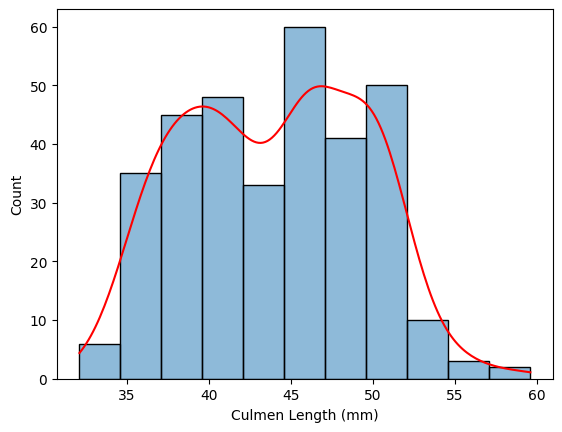

In [ ]:
import seaborn as sns
ax = sns.histplot(df, x="Culmen Length (mm)", kde=True)
ax.lines[0].set_color('red')

**<font color="blue">3. Afficher le graphique de densité de la colonne `Culmen Length (mm)` en comparaison avec la distribution normale pour les comparer.**

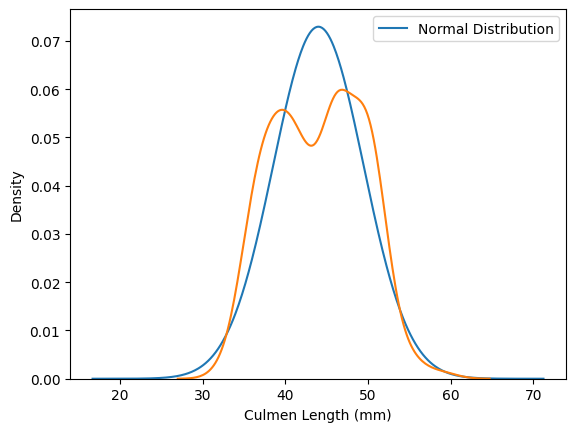

In [ ]:
import scipy
import numpy as np

def hist_normal(df, var_name ,ax=None):
    mean = df[var_name].mean()
    std = df[var_name].std()

    x = np.arange(mean-5*std,mean+5*std, 0.1)
    y = scipy.stats.norm.pdf(x, loc=mean, scale=std )

    sns.lineplot(x=x, y=y, label="Normal Distribution", ax=ax)
    sns.kdeplot(df, x=var_name, ax=ax)

hist_normal(df, "Culmen Length (mm)")

## Variables Categorielles

**<font color="blue">1. Trouvez le nombre de valeurs uniques, le mode et sa fréquence pour chaque variable catégorielle.**

In [ ]:
df_cat.describe()

,Species,Island,Sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,146,163,168


**<font color="blue">2.a. Comptez les occurrences des valeurs uniques de la variable `Species`.<br> 2.b. Modifiez les dénombrements en fréquences.<br>2.c. (Bonus) Formatez les fréquences en pourcentages.**

In [ ]:
df["Species"].value_counts()

,count
Species,
Adelie,146
Gentoo,119
Chinstrap,68


In [ ]:
df["Species"].value_counts(normalize=True).apply(lambda x:f"{x:.1%}")

,proportion
Species,
Adelie,43.8%
Gentoo,35.7%
Chinstrap,20.4%


**<font color="blue">3. Affichez le diagramme en secteurs de la variable `Species`.**

<Axes: ylabel='count'>

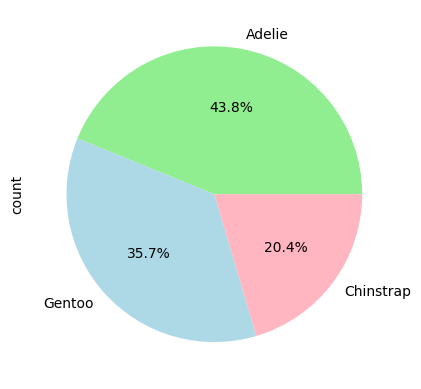

In [ ]:
df["Species"].value_counts().plot.pie(autopct='%1.1f%%',
                                      colors=["lightgreen", "lightblue", "lightpink"])

**<font color="blue">4. Affichez le graphique à barres de la variable `Species`.**
```
sns.countplot(data=df, x='col_name' ,stat='percent')
```

<Axes: xlabel='Species', ylabel='percent'>

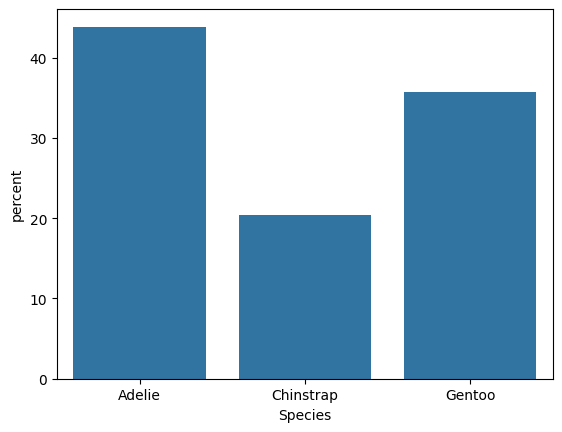

In [ ]:
sns.countplot(df, x="Species", stat="percent")

# **Analyse Bivariée**

**<font color="blue">1. Analysez la relation entre les variables `Species` et `Island`.<br> Interprétez le résultat.**

```
pd.crosstab(df["col_name_1"], df["col_name_2"],
            margins=True,
            margins_name='Total',
            normalize=True)
```

In [ ]:
pd.crosstab(df["Species"], df["Island"],
            margins=True,
            margins_name='Total',
            normalize=True).applymap(lambda x:f"{x:.1%}")

<ipython-input-52-abb84bd1eb23>:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Island,Biscoe,Dream,Torgersen,Total
Species,,,,
Adelie,13.2%,16.5%,14.1%,43.8%
Chinstrap,0.0%,20.4%,0.0%,20.4%
Gentoo,35.7%,0.0%,0.0%,35.7%
Total,48.9%,36.9%,14.1%,100.0%


**<font color="blue">2. Affichez le diagramme en boîte et le diagramme à barres de la colonne `Culmen Length (mm)` par rapport à la cible `Species`.<br> Interprétez le résultat !**

```
sns.boxplot(df, x="col_name_1", y="col_name_2")
```

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need t

<Axes: xlabel='Culmen Length (mm)', ylabel='Species'>

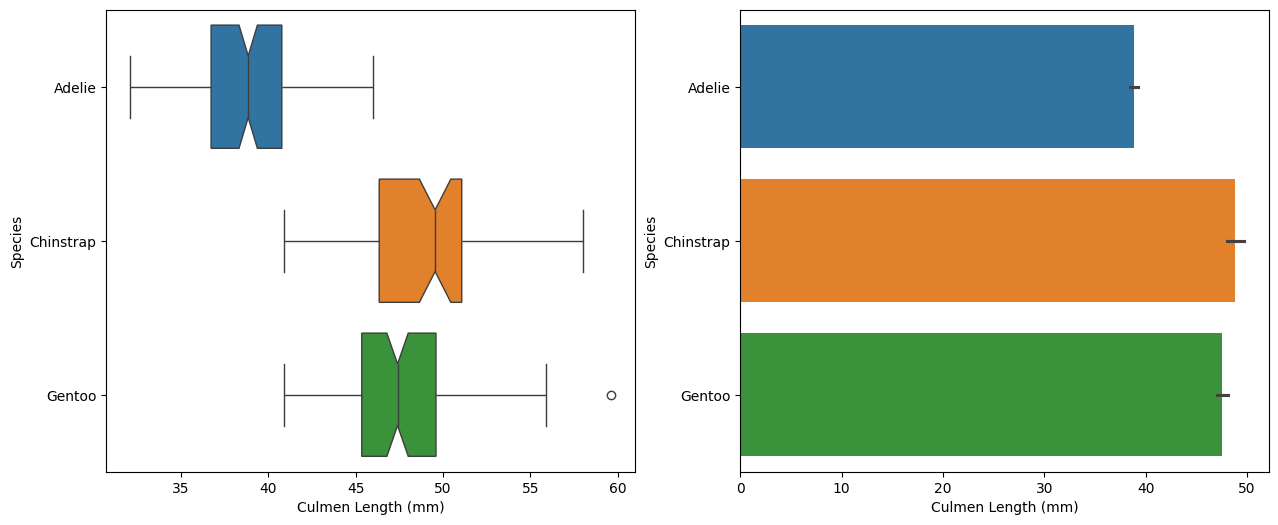

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(df, x="Culmen Length (mm)", y="Species", hue ="Species", notch=True, ax=axs[0])
sns.barplot(df, x="Culmen Length (mm)", y="Species", hue ="Species", estimator='mean', ax=axs[1])

**<font color="blue">3. Créez la carte thermique de corrélation pour les variables `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)` et `Body Mass (g)`. <br> Quelles variables sont les plus corrélées ?**

```
df.select_dtypes(include="number").corr()
```

```
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
```

<Axes: >

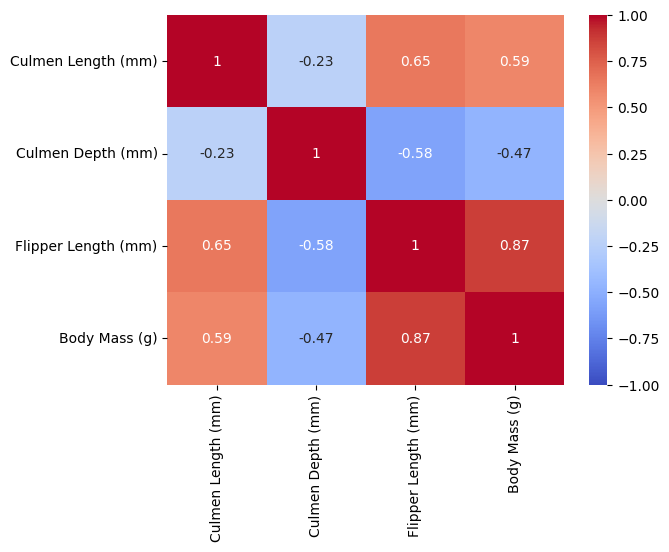

In [ ]:
cm = df.select_dtypes(include="number").corr()
sns.heatmap(cm, annot=True, vmin=-1, vmax=1, cmap=sns.color_palette("coolwarm", as_cmap=True))

**<font color="blue">4. Créez le graphique de dispersion des variables `Flipper Length (mm)` et `Body Mass (g)`. <br> Sont-elles corrélées ? Est-ce lié au coefficient de corrélation ?**

```
sns.scatterplot(correlation_matrix, annot=True, vmin=-1, vmax=1)
```

<Axes: xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

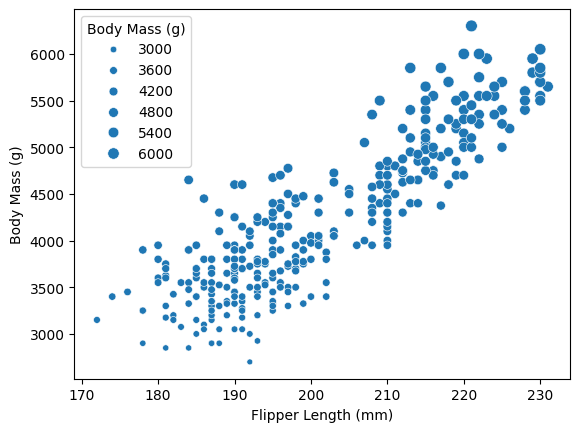

In [ ]:
sns.scatterplot(df, x="Flipper Length (mm)", y="Body Mass (g)", size = "Body Mass (g)")

**<font color="blue">5. Créez les autres graphiques de dispersion en utilisant un pair plot. <br> Interprétez les résultats.**
```
sns.pairplot(df)
```

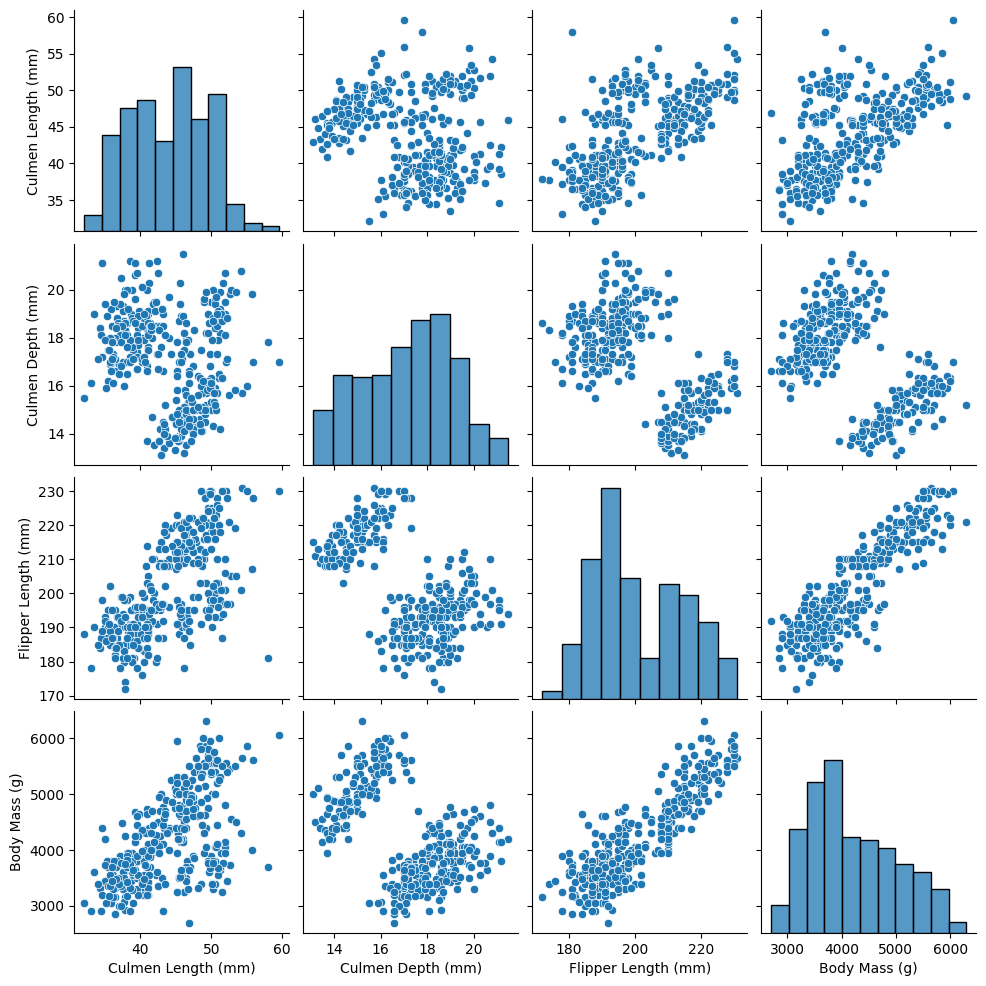

In [ ]:
sns.pairplot(df.select_dtypes('number'))

# **Analyse Multivariée**

**<font color="blue">1. Analyser la relation entre les caractéristiques numériques par groupe d'espèces.**

*Conseil : Vous pouvez utiliser la fonction pairplot et son paramètre hue.*

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

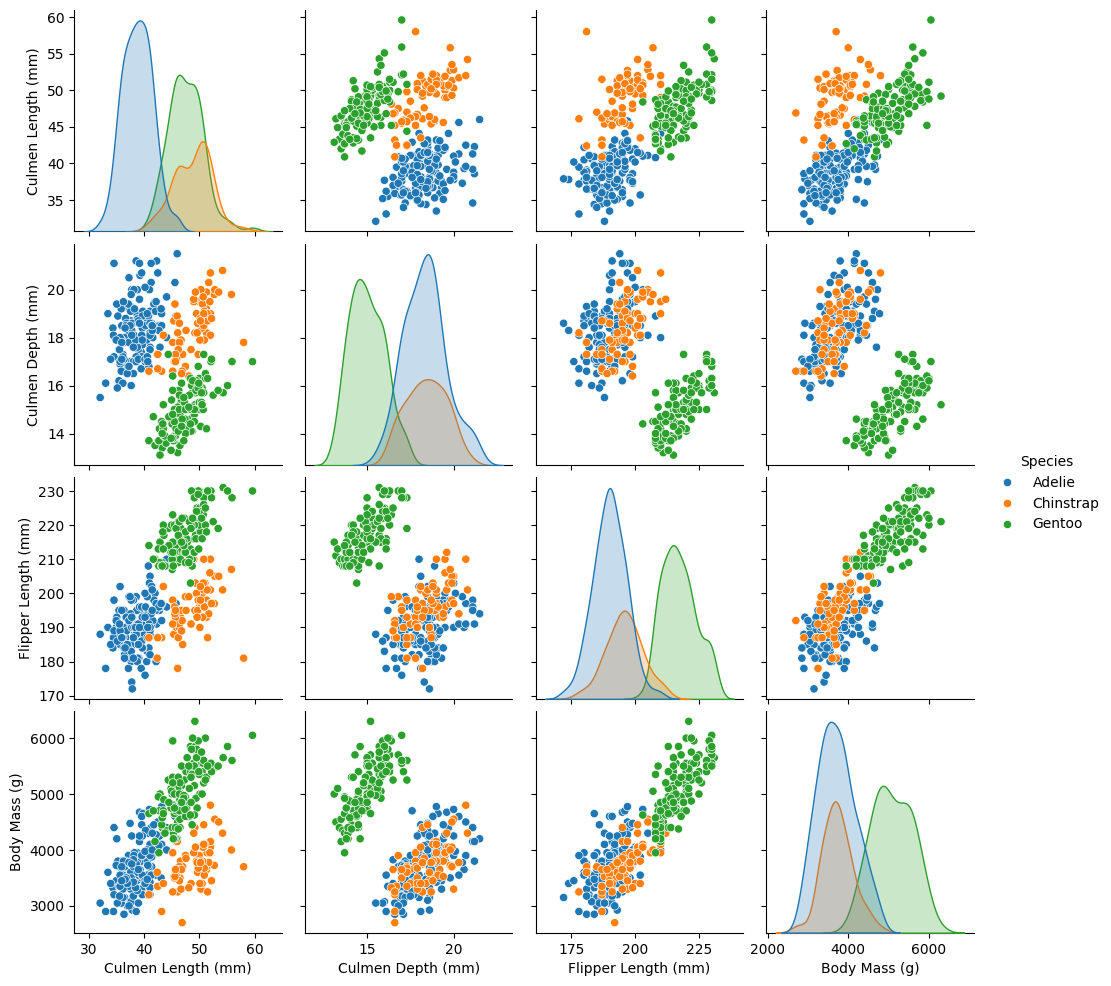

In [ ]:
sns.pairplot(df, hue="Species")

**<font color="blue">2. Analyser le dimorphisme sexuel des pingouins par espèce<br> c'est-à-dire la relation entre les caractéristiques numériques par groupe d'espèces selon le sexe.**

*Conseil : Vous pouvez regrouper les espèces en utilisant `penguin_species = df[df["Species"] == "penguin_species"]` puis utiliser un pairplot avec `Sex` comme paramètre de couleur (hue).*

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

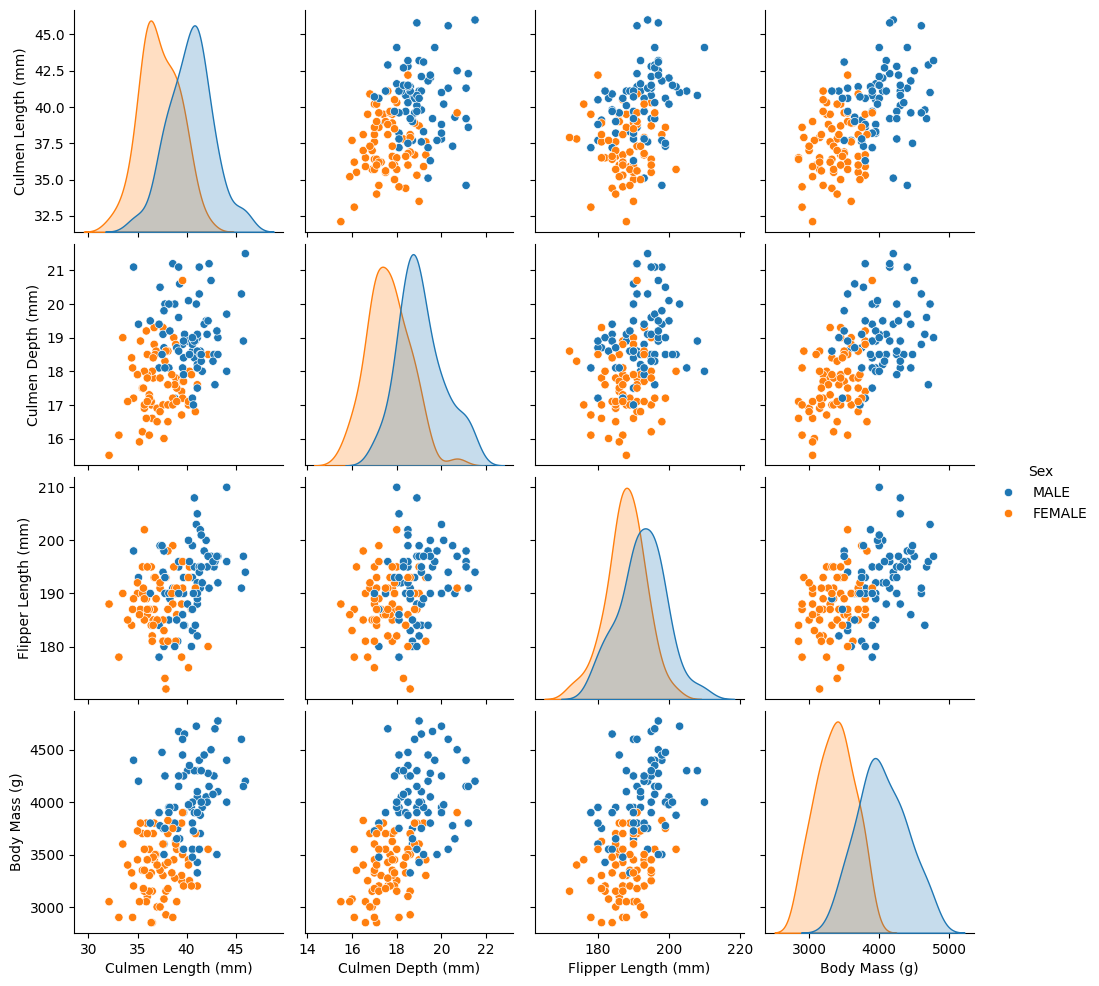

In [ ]:
adelie = df[df["Species"] == "Adelie"]
sns.pairplot(adelie, hue="Sex", hue_order=["MALE", "FEMALE"])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

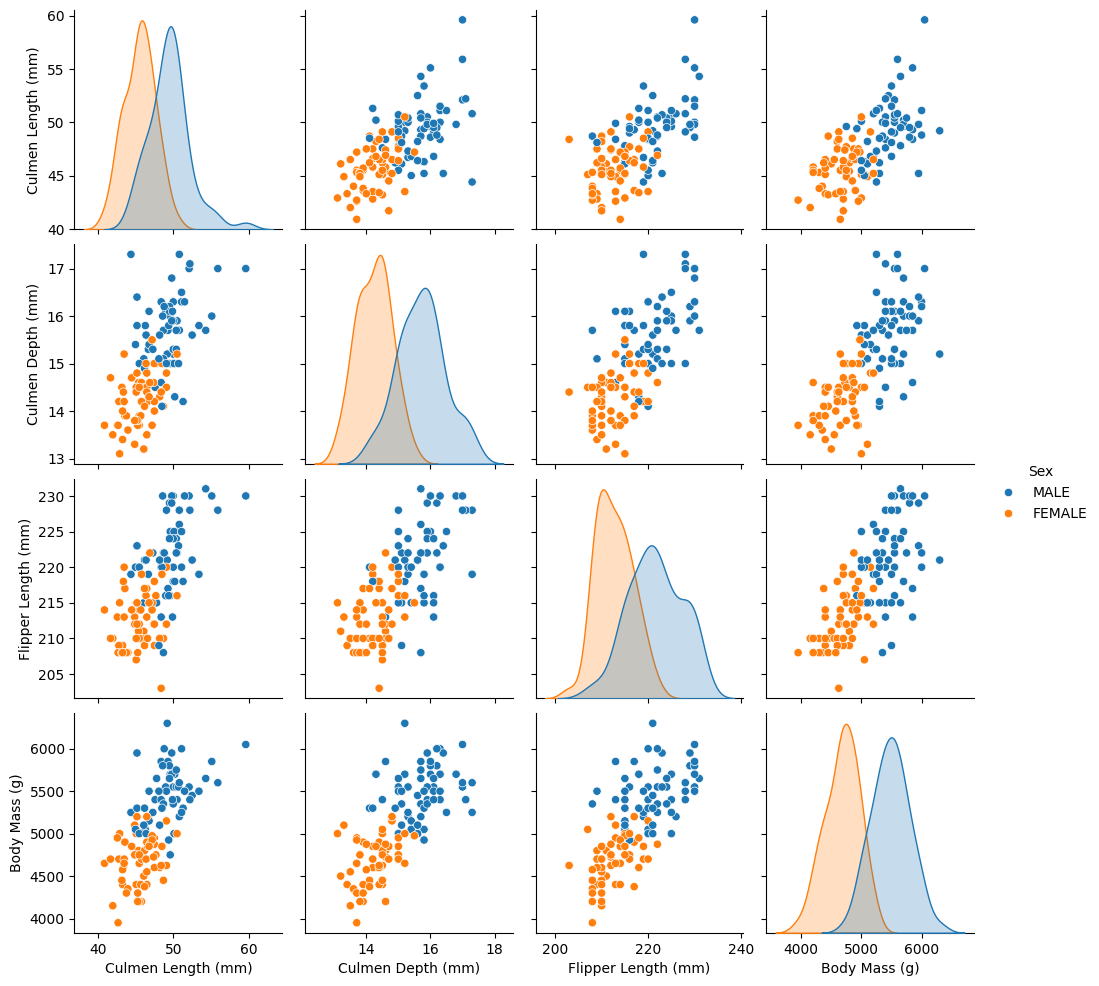

In [ ]:
# Gentoo Females are generally smaller is every feature
gentoo = df[df["Species"] == "Gentoo"]
sns.pairplot(gentoo, hue="Sex", hue_order=["MALE", "FEMALE"])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

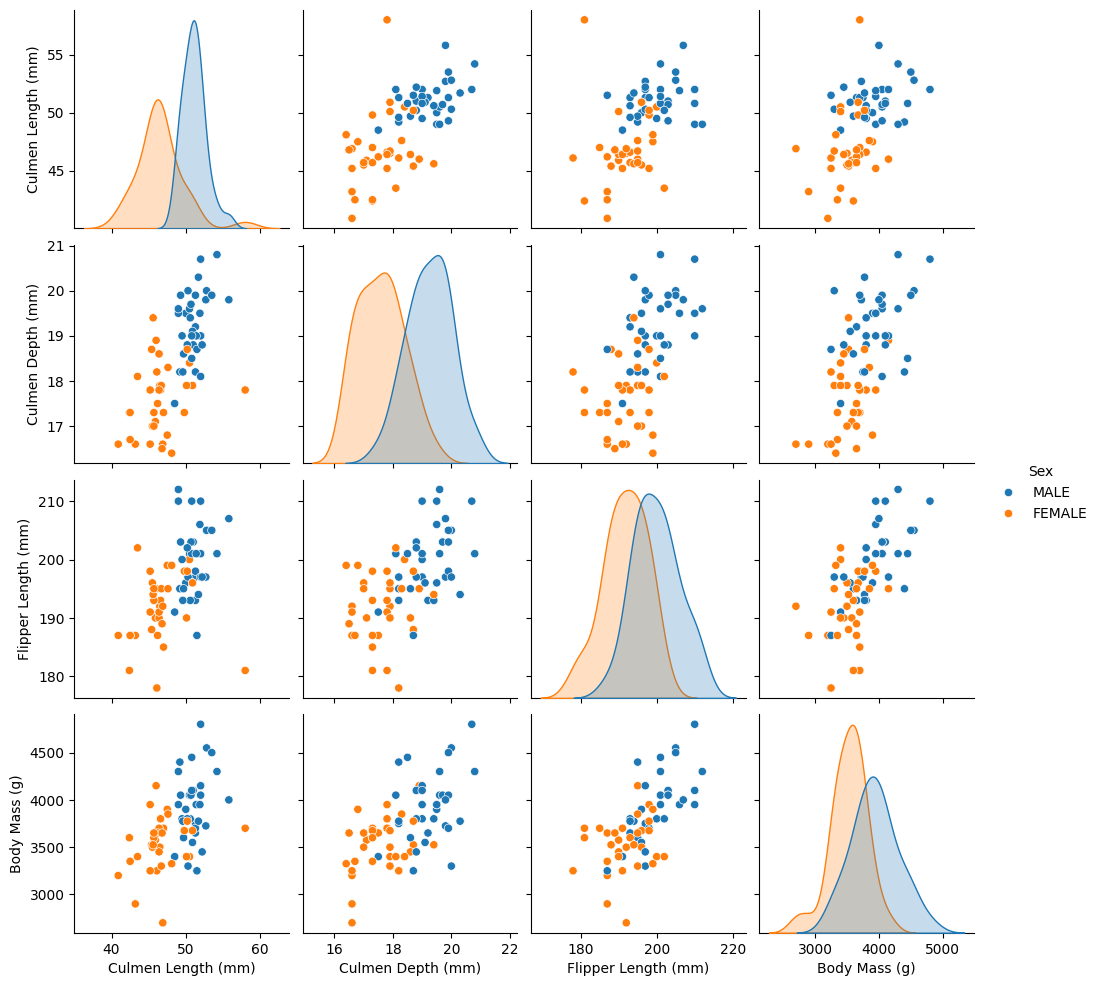

In [ ]:
chinstrap = df[df["Species"] == "Chinstrap"]
sns.pairplot(chinstrap, hue="Sex", hue_order=["MALE", "FEMALE"])

**<font color="blue">4.a. Créez un graphique en nuage de points qui regroupe les variables `Culmen Length (mm)`, `Culmen Depth (mm)`, `Body Mass (g)` et `Species`.**


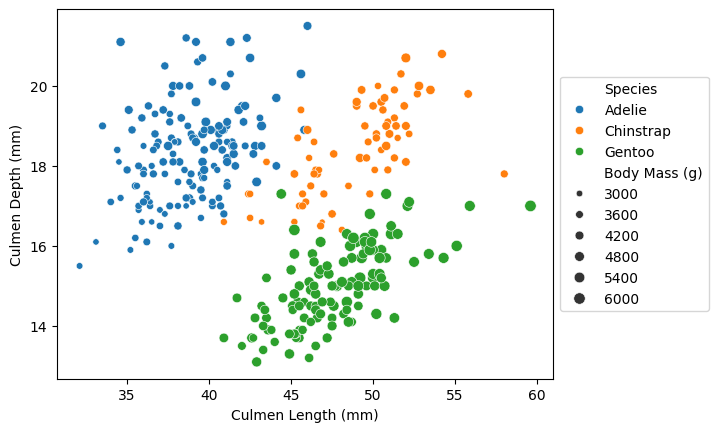

In [ ]:
sns.scatterplot(df, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", size="Body Mass (g)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**<font color="blue">4.b. Divisez le graphique précédent en deux graphiques : un pour les mâles et un pour les femelles.**

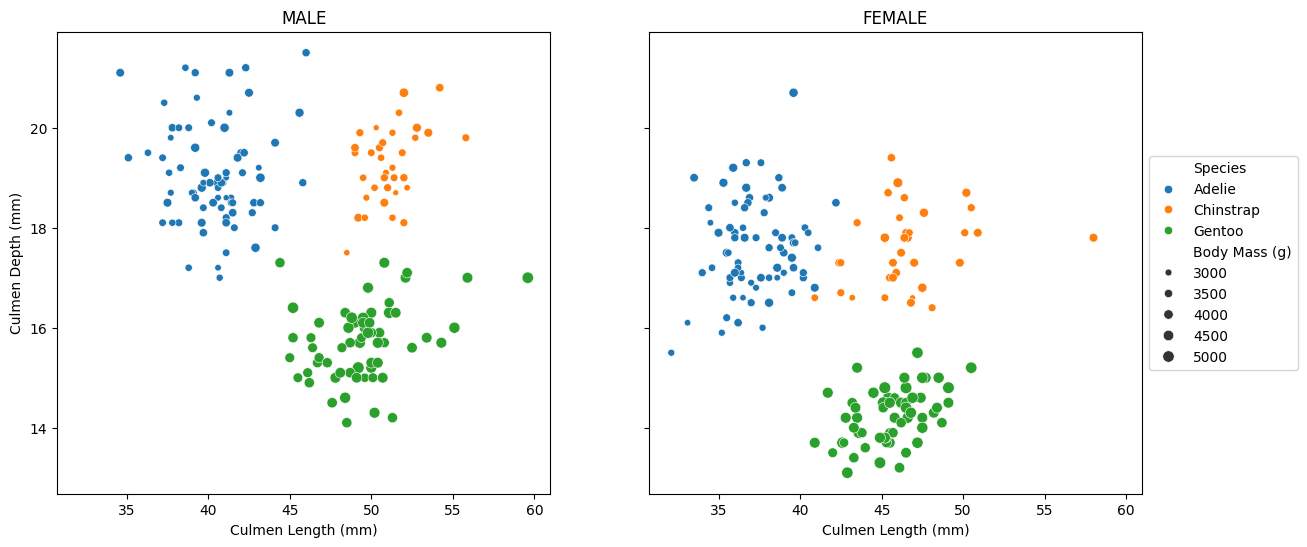

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,6), sharex=True, sharey=True)
sns.scatterplot(df[df["Sex"] == "MALE"], x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", size="Body Mass (g)", ax=axs[0])
axs[0].set_title("MALE")
axs[0].get_legend().remove()
sns.scatterplot(df[df["Sex"] == "FEMALE"], x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", size="Body Mass (g)", ax=axs[1])
axs[1].set_title("FEMALE")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Créer le nuage de points interactif
fig = px.scatter(df,
                 x="Culmen Length (mm)",
                 y="Culmen Depth (mm)",
                 color="Species",
                 title="Relation entre la longueur et la profondeur du bec des pingouins",
                 labels={"Culmen Length (mm)": "Longueur du bec (mm)",
                         "Culmen Depth (mm)": "Profondeur du bec (mm)"},
                 hover_data=["Sex", "Body Mass (g)"])

# Afficher le graphique
fig.show()